In [1]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

/home/michael/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_df = pd.read_csv("H1full.csv", dtype=dtypes, converters={'ArrivalDateWeekNumber': '{:0>2}'.format})

In [3]:
a=train_df.head()
b=train_df
b
c=b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)
c=pd.DataFrame(c)
c
type(c)

pandas.core.frame.DataFrame

In [4]:
from pandas import DataFrame  

df = DataFrame(c, columns= ['ArrivalDateYear', 'ArrivalDateWeekNumber']) 
df

,ArrivalDateYear,ArrivalDateWeekNumber
0,2015,27
1,2015,27
2,2015,27
3,2015,27
4,2015,27
...,...,...
40055,2017,35
40056,2017,35
40057,2017,35
40058,2017,35


In [5]:
# https://datatofish.com/concatenate-values-python/

df1 = df['ArrivalDateYear'].map(str) + df['ArrivalDateWeekNumber'].map(str)
print (df1)
df1=pd.DataFrame(df1)

0        201527
1        201527
2        201527
3        201527
4        201527
          ...  
40055    201735
40056    201735
40057    201735
40058    201735
40059    201735
Length: 40060, dtype: object


In [6]:
df2 = DataFrame(c, columns= ['IsCanceled']) 
df2

,IsCanceled
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
40055,0.0
40056,0.0
40057,0.0
40058,0.0


In [7]:
type(df1)

pandas.core.frame.DataFrame

In [8]:
df3=pd.concat([df1, df2], axis = 1)
df3
df3.columns = ['FullDate', 'IsCanceled']

In [9]:
df3
df3.sort_values(['FullDate','IsCanceled'], ascending=True)

,FullDate,IsCanceled
0,201527,0.0
1,201527,0.0
2,201527,0.0
3,201527,0.0
4,201527,0.0
...,...,...
13799,201735,1.0
13800,201735,1.0
13801,201735,1.0
13802,201735,1.0


In [10]:
df4 = df3.groupby('FullDate').agg(sum)
df4
df4.sort_values(['FullDate'], ascending=True)

,IsCanceled
FullDate,
201527,41.0
201528,48.0
201529,87.0
201530,74.0
201531,101.0
...,...
201731,173.0
201732,140.0
201733,182.0


In [11]:
tseries=df4['IsCanceled']
tseries

FullDate
201527     41.0
201528     48.0
201529     87.0
201530     74.0
201531    101.0
          ...  
201731    173.0
201732    140.0
201733    182.0
201734    143.0
201735    100.0
Name: IsCanceled, Length: 115, dtype: float64

In [12]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(tseries)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.914054
p-value: 0.043738
Critical Values:
	1%: -3.490
	5%: -2.888
	10%: -2.581


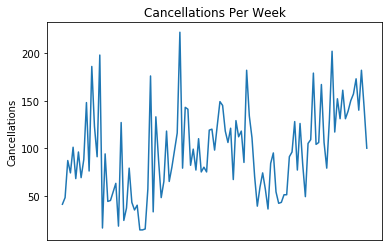

In [13]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Cancellations')
plt.title("Cancellations Per Week")
plt.show()

In [14]:
df=pd.DataFrame(tseries)
df

,IsCanceled
FullDate,
201527,41.0
201528,48.0
201529,87.0
201530,74.0
201531,101.0
...,...
201731,173.0
201732,140.0
201733,182.0


In [15]:
df = df[:100]

In [16]:
df

,IsCanceled
FullDate,
201527,41.0
201528,48.0
201529,87.0
201530,74.0
201531,101.0
...,...
201716,104.0
201717,106.0
201718,167.0


In [17]:
# Form dataset matrix
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
df

,IsCanceled
FullDate,
201527,41.0
201528,48.0
201529,87.0
201530,74.0
201531,101.0
...,...
201716,104.0
201717,106.0
201718,167.0


In [19]:
# normalize dataset with MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
df

array([[0.12980769],
       [0.16346154],
       [0.35096154],
       [0.28846154],
       [0.41826923],
       [0.25961538],
       [0.39423077],
       [0.26442308],
       [0.35576923],
       [0.64423077],
       [0.29807692],
       [0.82692308],
       [0.52403846],
       [0.37019231],
       [0.88461538],
       [0.00961538],
       [0.38461538],
       [0.14423077],
       [0.14903846],
       [0.19230769],
       [0.23557692],
       [0.01923077],
       [0.54326923],
       [0.04807692],
       [0.11057692],
       [0.3125    ],
       [0.13942308],
       [0.10096154],
       [0.125     ],
       [0.        ],
       [0.        ],
       [0.00480769],
       [0.20673077],
       [0.77884615],
       [0.09134615],
       [0.57211538],
       [0.35576923],
       [0.16346154],
       [0.24519231],
       [0.5       ],
       [0.24519231],
       [0.31730769],
       [0.40384615],
       [0.49038462],
       [1.        ],
       [0.3125    ],
       [0.62019231],
       [0.610

In [20]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Training and Validation data partition
train_size = int(len(df) * 0.8)
val_size = len(df) - train_size
train, val = df[0:train_size,:], df[train_size:len(df),:]

# Number of previous
previous = 5
X_train, Y_train = create_dataset(train, previous)
X_val, Y_val = create_dataset(val, previous)

/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework

In [21]:
X_train

array([[0.12980769, 0.16346154, 0.35096154, 0.28846154, 0.41826923],
       [0.16346154, 0.35096154, 0.28846154, 0.41826923, 0.25961538],
       [0.35096154, 0.28846154, 0.41826923, 0.25961538, 0.39423077],
       [0.28846154, 0.41826923, 0.25961538, 0.39423077, 0.26442308],
       [0.41826923, 0.25961538, 0.39423077, 0.26442308, 0.35576923],
       [0.25961538, 0.39423077, 0.26442308, 0.35576923, 0.64423077],
       [0.39423077, 0.26442308, 0.35576923, 0.64423077, 0.29807692],
       [0.26442308, 0.35576923, 0.64423077, 0.29807692, 0.82692308],
       [0.35576923, 0.64423077, 0.29807692, 0.82692308, 0.52403846],
       [0.64423077, 0.29807692, 0.82692308, 0.52403846, 0.37019231],
       [0.29807692, 0.82692308, 0.52403846, 0.37019231, 0.88461538],
       [0.82692308, 0.52403846, 0.37019231, 0.88461538, 0.00961538],
       [0.52403846, 0.37019231, 0.88461538, 0.00961538, 0.38461538],
       [0.37019231, 0.88461538, 0.00961538, 0.38461538, 0.14423077],
       [0.88461538, 0.00961538, 0.

In [22]:
Y_train

array([0.25961538, 0.39423077, 0.26442308, 0.35576923, 0.64423077,
       0.29807692, 0.82692308, 0.52403846, 0.37019231, 0.88461538,
       0.00961538, 0.38461538, 0.14423077, 0.14903846, 0.19230769,
       0.23557692, 0.01923077, 0.54326923, 0.04807692, 0.11057692,
       0.3125    , 0.13942308, 0.10096154, 0.125     , 0.        ,
       0.        , 0.00480769, 0.20673077, 0.77884615, 0.09134615,
       0.57211538, 0.35576923, 0.16346154, 0.24519231, 0.5       ,
       0.24519231, 0.31730769, 0.40384615, 0.49038462, 1.        ,
       0.3125    , 0.62019231, 0.61057692, 0.32692308, 0.40865385,
       0.30288462, 0.46153846, 0.29326923, 0.31730769, 0.29326923,
       0.50480769, 0.50961538, 0.40384615, 0.52884615, 0.64903846,
       0.62980769, 0.5       , 0.44230769, 0.51442308, 0.25480769,
       0.55288462, 0.47115385, 0.5       , 0.34134615, 0.80769231,
       0.57692308, 0.46634615, 0.26923077, 0.12019231, 0.21634615,
       0.28846154, 0.20673077, 0.10576923, 0.33653846])

Train on 59 samples, validate on 15 samples
Epoch 1/20
59/59 - 0s - loss: 0.1499 - val_loss: 0.1052
Epoch 2/20
59/59 - 0s - loss: 0.0996 - val_loss: 0.0646
Epoch 3/20
59/59 - 0s - loss: 0.0690 - val_loss: 0.0436
Epoch 4/20
59/59 - 0s - loss: 0.0530 - val_loss: 0.0357
Epoch 5/20
59/59 - 0s - loss: 0.0462 - val_loss: 0.0341
Epoch 6/20
59/59 - 0s - loss: 0.0440 - val_loss: 0.0344
Epoch 7/20
59/59 - 0s - loss: 0.0435 - val_loss: 0.0347
Epoch 8/20
59/59 - 0s - loss: 0.0435 - val_loss: 0.0351
Epoch 9/20
59/59 - 0s - loss: 0.0431 - val_loss: 0.0349
Epoch 10/20
59/59 - 0s - loss: 0.0429 - val_loss: 0.0349
Epoch 11/20
59/59 - 0s - loss: 0.0427 - val_loss: 0.0348
Epoch 12/20
59/59 - 0s - loss: 0.0424 - val_loss: 0.0353
Epoch 13/20
59/59 - 0s - loss: 0.0426 - val_loss: 0.0354
Epoch 14/20
59/59 - 0s - loss: 0.0421 - val_loss: 0.0352
Epoch 15/20
59/59 - 0s - loss: 0.0418 - val_loss: 0.0348
Epoch 16/20
59/59 - 0s - loss: 0.0419 - val_loss: 0.0348
Epoch 17/20
59/59 - 0s - loss: 0.0417 - val_loss: 0.0

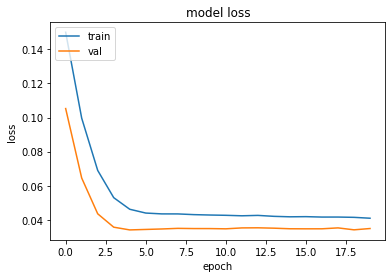

In [23]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

# Generate LSTM network
model = tf.keras.Sequential()
model.add(LSTM(4, input_shape=(1, previous)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=20, batch_size=1, verbose=2)


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
# Generate predictions
trainpred = model.predict(X_train)
valpred = model.predict(X_val)

In [25]:
trainpred

array([[0.33058745],
       [0.3620144 ],
       [0.3591258 ],
       [0.3638097 ],
       [0.3632413 ],
       [0.33799988],
       [0.43863183],
       [0.38820648],
       [0.46615273],
       [0.5132445 ],
       [0.39448148],
       [0.5152788 ],
       [0.39879692],
       [0.33770794],
       [0.37987703],
       [0.2591478 ],
       [0.29984528],
       [0.30491218],
       [0.23056939],
       [0.34791678],
       [0.32186717],
       [0.22764982],
       [0.33903822],
       [0.29024968],
       [0.25684193],
       [0.27767968],
       [0.23474559],
       [0.211333  ],
       [0.20342176],
       [0.21616149],
       [0.40136528],
       [0.33912247],
       [0.37058198],
       [0.44842476],
       [0.30846214],
       [0.32658988],
       [0.38639975],
       [0.35455984],
       [0.3349281 ],
       [0.3865975 ],
       [0.38294357],
       [0.512267  ],
       [0.4802103 ],
       [0.44788456],
       [0.52608913],
       [0.41391546],
       [0.41417104],
       [0.392

In [26]:
valpred

array([[0.27948284],
       [0.2725013 ],
       [0.32168126],
       [0.36073315],
       [0.4096235 ],
       [0.39322197],
       [0.41444248],
       [0.4220519 ],
       [0.31638753],
       [0.3736728 ],
       [0.39479554],
       [0.46654308],
       [0.47653562],
       [0.4172473 ]], dtype=float32)

In [27]:
# Convert predictions back to normal values
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
valpred = scaler.inverse_transform(valpred)
Y_val = scaler.inverse_transform([Y_val])
predictions = valpred

In [28]:
Y_train.shape

(1, 74)

In [29]:
Y_val.shape

(1, 14)

In [30]:
X_train.shape

(74, 1, 5)

In [31]:
X_val.shape

(14, 1, 5)

In [32]:
Y_train

array([[ 68.,  96.,  69.,  88., 148.,  76., 186., 123.,  91., 198.,  16.,
         94.,  44.,  45.,  54.,  63.,  18., 127.,  24.,  37.,  79.,  43.,
         35.,  40.,  14.,  14.,  15.,  57., 176.,  33., 133.,  88.,  48.,
         65., 118.,  65.,  80.,  98., 116., 222.,  79., 143., 141.,  82.,
         99.,  77., 110.,  75.,  80.,  75., 119., 120.,  98., 124., 149.,
        145., 118., 106., 121.,  67., 129., 112., 118.,  85., 182., 134.,
        111.,  70.,  39.,  59.,  74.,  57.,  36.,  84.]])

In [33]:
Y_val

array([[ 91.,  96., 128.,  77., 126.,  83.,  49., 105., 109., 179., 104.,
        106., 167., 106.]])

In [34]:
X_train

array([[[0.12980769, 0.16346154, 0.35096154, 0.28846154, 0.41826923]],

       [[0.16346154, 0.35096154, 0.28846154, 0.41826923, 0.25961538]],

       [[0.35096154, 0.28846154, 0.41826923, 0.25961538, 0.39423077]],

       [[0.28846154, 0.41826923, 0.25961538, 0.39423077, 0.26442308]],

       [[0.41826923, 0.25961538, 0.39423077, 0.26442308, 0.35576923]],

       [[0.25961538, 0.39423077, 0.26442308, 0.35576923, 0.64423077]],

       [[0.39423077, 0.26442308, 0.35576923, 0.64423077, 0.29807692]],

       [[0.26442308, 0.35576923, 0.64423077, 0.29807692, 0.82692308]],

       [[0.35576923, 0.64423077, 0.29807692, 0.82692308, 0.52403846]],

       [[0.64423077, 0.29807692, 0.82692308, 0.52403846, 0.37019231]],

       [[0.29807692, 0.82692308, 0.52403846, 0.37019231, 0.88461538]],

       [[0.82692308, 0.52403846, 0.37019231, 0.88461538, 0.00961538]],

       [[0.52403846, 0.37019231, 0.88461538, 0.00961538, 0.38461538]],

       [[0.37019231, 0.88461538, 0.00961538, 0.38461538, 0.14423

In [35]:
X_val

array([[[0.19230769, 0.13461538, 0.13942308, 0.17788462, 0.17788462]],

       [[0.13461538, 0.13942308, 0.17788462, 0.17788462, 0.37019231]],

       [[0.13942308, 0.17788462, 0.17788462, 0.37019231, 0.39423077]],

       [[0.17788462, 0.17788462, 0.37019231, 0.39423077, 0.54807692]],

       [[0.17788462, 0.37019231, 0.39423077, 0.54807692, 0.30288462]],

       [[0.37019231, 0.39423077, 0.54807692, 0.30288462, 0.53846154]],

       [[0.39423077, 0.54807692, 0.30288462, 0.53846154, 0.33173077]],

       [[0.54807692, 0.30288462, 0.53846154, 0.33173077, 0.16826923]],

       [[0.30288462, 0.53846154, 0.33173077, 0.16826923, 0.4375    ]],

       [[0.53846154, 0.33173077, 0.16826923, 0.4375    , 0.45673077]],

       [[0.33173077, 0.16826923, 0.4375    , 0.45673077, 0.79326923]],

       [[0.16826923, 0.4375    , 0.45673077, 0.79326923, 0.43269231]],

       [[0.4375    , 0.45673077, 0.79326923, 0.43269231, 0.44230769]],

       [[0.45673077, 0.79326923, 0.43269231, 0.44230769, 0.73557

In [36]:
import math
from sklearn.metrics import mean_squared_error

# calculate RMSE
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = math.sqrt(mean_squared_error(Y_val[0], valpred[:,0]))
print('Validation Score: %.2f RMSE' % (valScore))

Train Score: 41.32 RMSE
Validation Score: 36.21 RMSE


In [37]:
# Train predictions
trainpredPlot = np.empty_like(df)
trainpredPlot[:, :] = np.nan
trainpredPlot[previous:len(trainpred)+previous, :] = trainpred

In [38]:
# Validation predictions
valpredPlot = np.empty_like(df)
valpredPlot[:, :] = np.nan
valpredPlot[len(trainpred)+(previous*2)+1:len(df)-1, :] = valpred

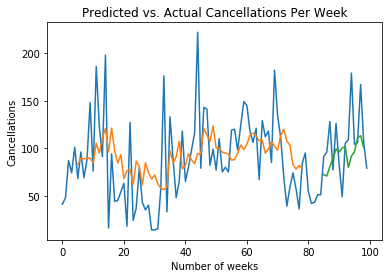

In [39]:
# Plot all predictions
inversetransform, =plt.plot(scaler.inverse_transform(df))
trainpred, =plt.plot(trainpredPlot)
valpred, =plt.plot(valpredPlot)
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Cancellations Per Week")
plt.show()

In [40]:
Y_val=Y_val.reshape(-1)
Y_val.shape
Y_val=pd.Series(Y_val)

In [41]:
Y_val

0      91.0
1      96.0
2     128.0
3      77.0
4     126.0
5      83.0
6      49.0
7     105.0
8     109.0
9     179.0
10    104.0
11    106.0
12    167.0
13    106.0
dtype: float64

In [42]:
predictions=predictions.reshape(-1)
predictions.shape
predictions=pd.Series(predictions)

In [43]:
predictions

0      72.132431
1      70.680267
2      80.909698
3      89.032494
4      99.201683
5      95.790169
6     100.204033
7     101.786797
8      79.808601
9      91.723946
10     96.117470
11    111.040962
12    113.119415
13    100.787437
dtype: float32

In [44]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [45]:
mda(Y_val, predictions)

0.8571428571428571

In [46]:
# https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/

from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(Y_val, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 36.213995


In [47]:
forecast_error = (predictions-Y_val)
forecast_error

0    -18.867569
1    -25.319733
2    -47.090302
3     12.032494
4    -26.798317
5     12.790169
6     51.204033
7     -3.213203
8    -29.191399
9    -87.276054
10    -7.882530
11     5.040962
12   -53.880585
13    -5.212563
dtype: float64

In [48]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

-15.97604261125837

In [49]:
X_train

array([[[0.12980769, 0.16346154, 0.35096154, 0.28846154, 0.41826923]],

       [[0.16346154, 0.35096154, 0.28846154, 0.41826923, 0.25961538]],

       [[0.35096154, 0.28846154, 0.41826923, 0.25961538, 0.39423077]],

       [[0.28846154, 0.41826923, 0.25961538, 0.39423077, 0.26442308]],

       [[0.41826923, 0.25961538, 0.39423077, 0.26442308, 0.35576923]],

       [[0.25961538, 0.39423077, 0.26442308, 0.35576923, 0.64423077]],

       [[0.39423077, 0.26442308, 0.35576923, 0.64423077, 0.29807692]],

       [[0.26442308, 0.35576923, 0.64423077, 0.29807692, 0.82692308]],

       [[0.35576923, 0.64423077, 0.29807692, 0.82692308, 0.52403846]],

       [[0.64423077, 0.29807692, 0.82692308, 0.52403846, 0.37019231]],

       [[0.29807692, 0.82692308, 0.52403846, 0.37019231, 0.88461538]],

       [[0.82692308, 0.52403846, 0.37019231, 0.88461538, 0.00961538]],

       [[0.52403846, 0.37019231, 0.88461538, 0.00961538, 0.38461538]],

       [[0.37019231, 0.88461538, 0.00961538, 0.38461538, 0.14423

In [50]:
X_train.shape

(74, 1, 5)

In [51]:
# Test (unseen) predictions
# (t) and (t-5)
Xnew = np.array([[130,202,117,152,131],[202,117,152,131,161],[117,152,131,161,131],[152,131,161,131,139],[131,161,131,139,150],[161,131,139,150,157],[131,139,150,157,173],[139,150,157,173,140],[150,157,173,140,182],[157,173,140,182,143]])

In [52]:
Xnew

array([[130, 202, 117, 152, 131],
       [202, 117, 152, 131, 161],
       [117, 152, 131, 161, 131],
       [152, 131, 161, 131, 139],
       [131, 161, 131, 139, 150],
       [161, 131, 139, 150, 157],
       [131, 139, 150, 157, 173],
       [139, 150, 157, 173, 140],
       [150, 157, 173, 140, 182],
       [157, 173, 140, 182, 143]])

In [53]:
Xnew = scaler.fit_transform(Xnew)
Xnew
Xnewformat = np.reshape(Xnew, (Xnew.shape[0], 1, Xnew.shape[1]))
ynew=model.predict(Xnewformat)

In [54]:
Xnew.shape

(10, 5)

In [55]:
ynew

array([[0.3285796 ],
       [0.38305306],
       [0.3826606 ],
       [0.37029284],
       [0.2869468 ],
       [0.39245856],
       [0.42184412],
       [0.513104  ],
       [0.43073   ],
       [0.51655656]], dtype=float32)

In [56]:
type(ynew)

numpy.ndarray

In [57]:
ynew.shape

(10, 1)

In [58]:
actual = np.array([[161,131,139,150,157,173,140,182,143,100]])

In [59]:
actual=actual.reshape(10,-1)
actual.shape

(10, 1)

In [60]:
actual

array([[161],
       [131],
       [139],
       [150],
       [157],
       [173],
       [140],
       [182],
       [143],
       [100]])

In [61]:
ynew=ynew.reshape(-1)
actual=actual.reshape(-1)
actualpd=pd.Series(actual)

In [62]:
np.min(df)

0.0

In [63]:
ynew

array([0.3285796 , 0.38305306, 0.3826606 , 0.37029284, 0.2869468 ,
       0.39245856, 0.42184412, 0.513104  , 0.43073   , 0.51655656],
      dtype=float32)

In [64]:
maxcancel=np.max(tseries)

In [65]:
mincancel=np.min(tseries)

In [66]:
ynew = ynew * np.abs(maxcancel-mincancel) + np.min(tseries)
ynewpd=pd.Series(ynew)

In [67]:
actualpd

0    161
1    131
2    139
3    150
4    157
5    173
6    140
7    182
8    143
9    100
dtype: int64

In [68]:
ynewpd

0     82.344559
1     93.675034
2     93.593407
3     91.020912
4     73.684937
5     95.631378
6    101.743576
7    120.725639
8    103.591835
9    121.443764
dtype: float32

In [69]:
mda(actualpd, ynewpd)

0.8

In [70]:
mse = mean_squared_error(actualpd, ynewpd)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 57.687404


In [71]:
forecast_error = (ynewpd-actualpd)
forecast_error

0   -78.655441
1   -37.324966
2   -45.406593
3   -58.979088
4   -83.315063
5   -77.368622
6   -38.256424
7   -61.274361
8   -39.408165
9    21.443764
dtype: float64

In [72]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

-49.854496002197266

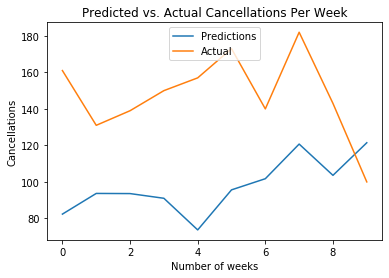

In [73]:
predictons, =plt.plot(ynewpd, label='Predictions')
actual, =plt.plot(actualpd, label='Actual')
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Cancellations Per Week")
plt.legend(loc = 'upper center')
plt.show()

## Memory Usage

In [74]:
# https://stackoverflow.com/questions/276052/how-to-get-current-cpu-and-ram-usage-in-python

import os
import psutil
pid = os.getpid()
py = psutil.Process(pid)
memoryUse = py.memory_info()[0]/2.**30
memoryUse

0.3798866271972656